# Lecture 10 - Business Data Analytics

In [6]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Read and Process Data

In [7]:
# Read data
dfSki = pd.read_csv('ski.csv', header=0)

dfSki

,Age,Income
0,57,210059
1,55,225671
2,32,215829
3,26,235452
4,27,223691
5,58,220478
6,32,234015
7,57,216981
8,61,221818
9,52,82751


In [8]:
# Check if there are any missing fields
pd.isnull(dfSki).sum()

Age       0
Income    0
dtype: int64

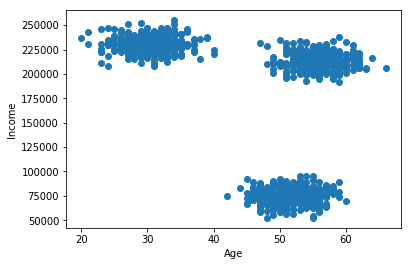

In [9]:
plt_x = dfSki["Age"]
plt_y = dfSki["Income"]
    
plt.scatter(plt_x, plt_y)
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

## K-Means Model

In [10]:
# Add K-Means algorithm here
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(dfSki)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [11]:
kmeans.labels_

array([1, 2, 1, ..., 1, 1, 2])

In [12]:
dfSki.loc[:, 'Cluster'] = kmeans.labels_
dfSki.head()

,Age,Income,Cluster
0,57,210059,1
1,55,225671,2
2,32,215829,1
3,26,235452,2
4,27,223691,2


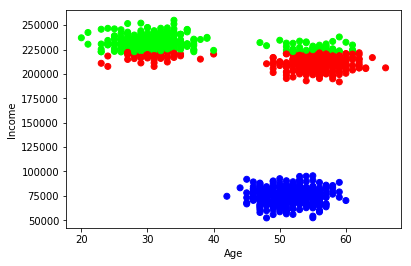

In [13]:
plt.scatter(dfSki['Age'], dfSki['Income'], c=dfSki['Cluster'], cmap='brg')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()
# this looks messy, so we have to scale our data

In [14]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

scalar.fit(dfSki[['Age', 'Income']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
scaled_features = scalar.transform(dfSki[['Age', 'Income']])
scaled_df = pd.DataFrame(scaled_features, columns=dfSki[['Age', 'Income']].columns)
scaled_df.head()

,Age,Income
0,0.961578,0.525617
1,0.787542,0.748026
2,-1.213868,0.607816
3,-1.735975,0.887366
4,-1.648957,0.719819


In [16]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [17]:
dfSki.loc[:, 'Cluster'] = kmeans.labels_
dfSki.head()

,Age,Income,Cluster
0,57,210059,0
1,55,225671,0
2,32,215829,1
3,26,235452,1
4,27,223691,1


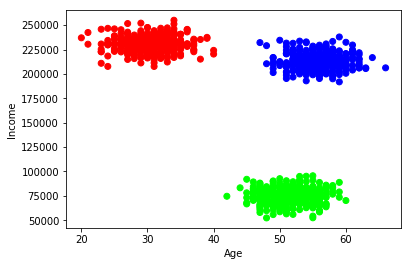

In [18]:
plt.scatter(dfSki['Age'], dfSki['Income'], c=dfSki['Cluster'], cmap='brg')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [19]:
df_cluster = dfSki.groupby('Cluster').mean()
df_cluster

,Age,Income
Cluster,,
0,55.798942,213321.902116
1,30.525199,231058.514589
2,51.498674,75003.031830


In [20]:
kmeans.inertia_  # sum of the distance

101.86699588903608

In [21]:
ks = []
distances = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_df)
    print(str(k) + "-->" + str(kmeans.inertia_))
    ks.append(k)
    distances.append(kmeans.inertia_)

1-->2264.0
2-->861.183069056
3-->101.866995889
4-->81.0592573748
5-->63.2070618784
6-->45.8779228612
7-->40.3247005187
8-->35.1401637793
9-->30.2463667013
10-->27.8635468553


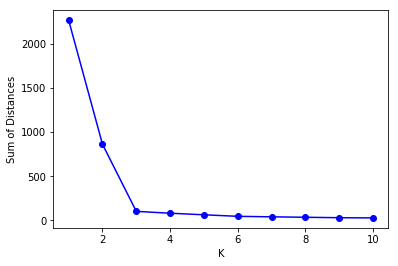

In [22]:
plt.plot(ks, distances, '-bo')
plt.xlabel('K')
plt.ylabel('Sum of Distances')
plt.show()

# you pick 3 because that's the start of the elbow